In [1]:
import os 
import sys #imports library for working with system commands
import pandas as pd  #Imports pandas for working with dataframes, with the abbreviation 'pd'
import matplotlib #Imports matplotlib for graphing and such
import matplotlib.pyplot as plt  #Imports the major matplotlib library for making charts (pyplot) as 'plot'
from matplotlib.collections import LineCollection #For doing collections of lines, like the historical timeline
from matplotlib import colors as mcolors #Getting cool colors
import numpy as np #imports numpy, which has many math like commands, as 'np'
import seaborn as sns #imports advanced graphing library (seaborn) as 'sb'
#Make matplotlib inline, to display the results of analysis on the screen.  This is a 'magic' command (passthrough)
%matplotlib inline
plt.style.use('seaborn-deep')
sns.set_style("darkgrid",{"font.sans-serif":['PMingLiU', 'Arial']})

In [2]:
os.chdir("C:/Users/baxte/Documents/blog/Chinese Emperors")
sns.set(rc={'figure.figsize':(6,8)})
matplotlib.rcParams.update({'font.size': 10})

emps_file = pd.ExcelFile("chineseemperors.xlsx")
ChinaEmpire = emps_file.parse("Dynasties and Emperors")
MSE = emps_file.parse("MSE")
XSZCP = emps_file.parse("XSZCP")

The code below is meant to split up the dynasties into bite sized chunks.

In [65]:
PreImperial = MSE[MSE.Age == 'Pre-Imperial']
Imperial = MSE[MSE.Age == 'Imperial']

ThreeSovereigns = ChinaEmpire[ChinaEmpire.DynastyCode == '00a']
FiveEmperors = ChinaEmpire[ChinaEmpire.DynastyCode == '00b']

Xia = MSE[MSE.DynastyCode == '02a']
XiaXSZCP = XSZCP[XSZCP.DynastyCode == '02a']

EarlyShang = MSE[MSE.DynastyCode == '03a']
EarlyShangXSZCP = XSZCP[XSZCP.DynastyCode == '03a']
LateShang = MSE[MSE.DynastyCode == '03b']
LateShangXSZCP = XSZCP[XSZCP.DynastyCode == '03b']

Shang = MSE[MSE.DynastyCode.isin(['03a','03b'])]


Here, I'm examining how the different pre-imperial dynasties stack up in terms of ruler length, using a boxplot to explore the various dynasties.

[Text(0,0.5,''),
 Text(0.5,0,'Length of Reign in Years'),
 Text(0.5,1,'Pre-Imperial Rulers: Length of Reign by Dynasty')]

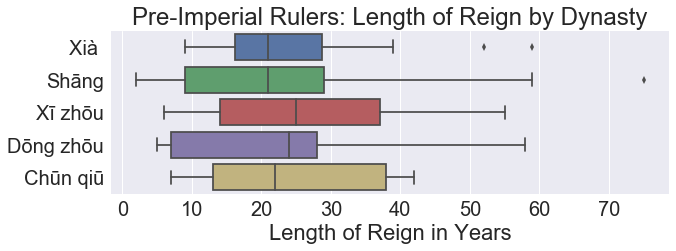

In [85]:
sns.set(rc={'figure.figsize':(10,)}, font_scale=2)
sns.boxplot(y="EnglishDynasty", x="Length", data=PreImperial).set(xlabel='Length of Reign in Years', ylabel='', title='Pre-Imperial Rulers: Length of Reign by Dynasty')

This is the same as before (boxplot of ruler length) but I'm examining all dynasties within the imperial period.

[Text(0,0.5,''),
 Text(0.5,0,'Length of Reign in Years'),
 Text(0.5,1,'Imperial Rulers: Length of Reign by Dynasty')]

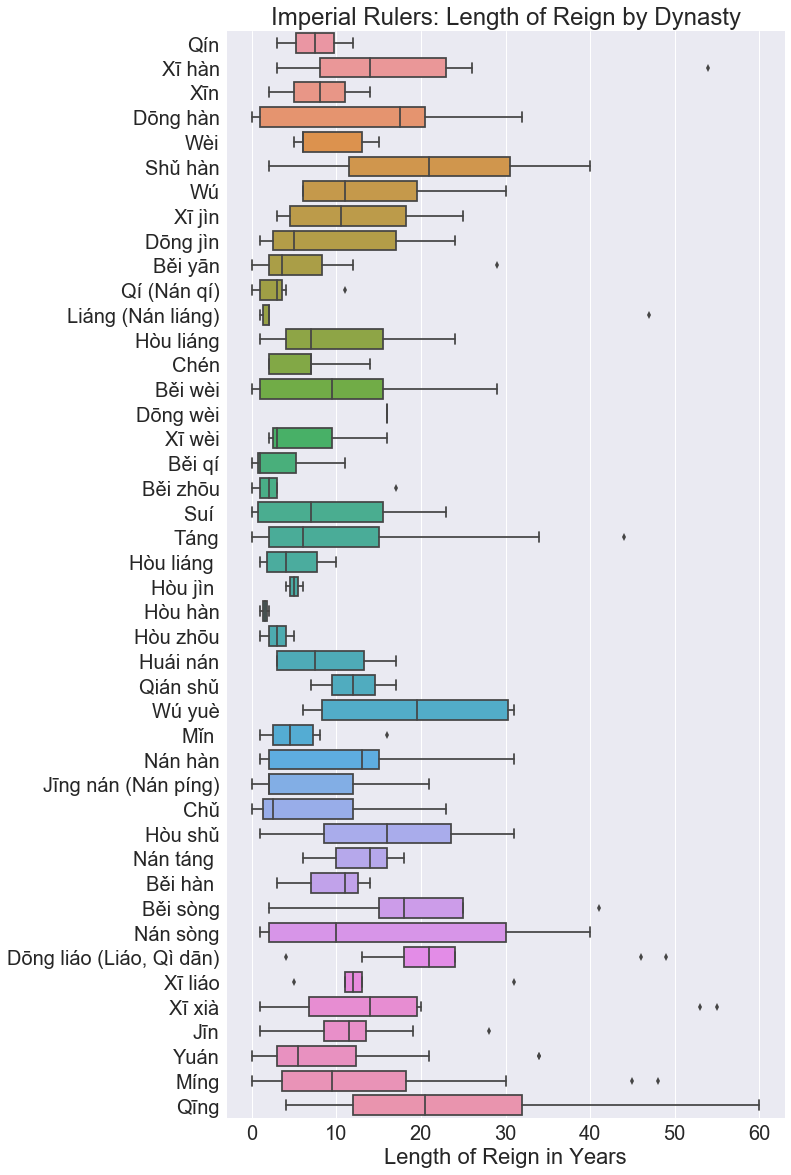

In [17]:
sns.set(rc={'figure.figsize':(10,20)}, font_scale=2)
sns.boxplot(y="EnglishDynasty", x="Length", data=Imperial).set(xlabel='Length of Reign in Years', ylabel='', title='Imperial Rulers: Length of Reign by Dynasty')

In [22]:
fig_size = plt.rcParams["figure.figsize"]

In [109]:
Xia.head()

,DynastyCode,Age,ReignCode,Dynasty,EnglishDynasty,ReignName,TempleName,Birth Name,EnglishTempleName,Start,Finish,Length,AgeAtDeath,CoD,War,Famine,Achievements,Image
0,02a,Pre-Imperial,1,Xià 夏,Xià,NaN,Dà Yǔ 大禹,Yu the Great,Dà Yǔ,-2207,-2197,10,NaN,NaN,NaN,NaN,stopped flooding,https://en.wikipedia.org/wiki/Yu_the_Great#/me...
1,02a,Pre-Imperial,2,Xià 夏,Xià,NaN,Qǐ 啟 启,NaN,Qǐ,-2197,-2188,9,NaN,NaN,NaN,NaN,NaN,NaN
2,02a,Pre-Imperial,3,Xià 夏,Xià,NaN,Tài kāng 太康,NaN,Tài kāng,-2188,-2159,29,NaN,NaN,NaN,NaN,NaN,NaN
3,02a,Pre-Imperial,4,Xià 夏,Xià,NaN,Zhòng kāng 仲康,NaN,Zhòng kāng,-2159,-2146,13,NaN,NaN,NaN,NaN,NaN,NaN
4,02a,Pre-Imperial,5,Xià 夏,Xià,NaN,Xiāng 相,NaN,Xiāng,-2146,-2118,28,NaN,NaN,NaN,NaN,NaN,NaN


I'm going to be separating the different dynasties so I can do analysis on each of them.

# Three Sovereigns Five Emperors

Text(0,0.5,'Length of Rule (Years)')

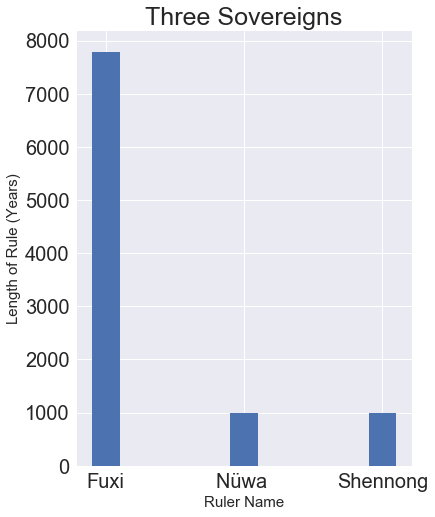

In [186]:
plt.bar(ThreeSovereigns['EnglishName'], ThreeSovereigns['Length'], .2)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.title('Three Sovereigns', fontsize = '25')
plt.xlabel('Ruler Name', fontsize = '15')
plt.ylabel('Length of Rule (Years)', fontsize = '15')

Text(0,0.5,'Length of Rule (Years)')

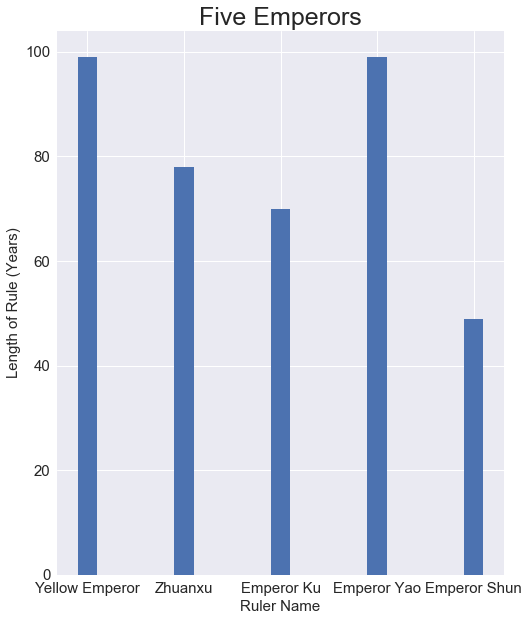

In [187]:
plt.figure(figsize=(8,10))
plt.bar(FiveEmperors['EnglishName'], FiveEmperors['Length'], .2)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.title('Five Emperors', fontsize = '25')
plt.xlabel('Ruler Name', fontsize = '15')
plt.ylabel('Length of Rule (Years)', fontsize = '15')

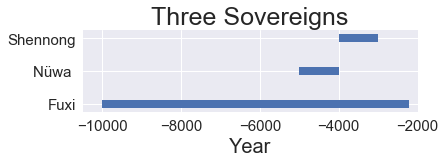

In [229]:
event = ThreeSovereigns['EnglishName']
begin = ThreeSovereigns['Start']
end = ThreeSovereigns['Finish']

beg_sort = np.sort(begin)
end_sort = end[np.argsort(begin)]
evt_sort = event[np.argsort(begin)]

plt.figure(figsize=(6,1.5))
plt.barh(range(len(beg_sort)), end_sort-beg_sort, .25, left=beg_sort, align='center')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.title('Three Sovereigns', fontsize = '25')
plt.xlabel('Year', fontsize = '20')
plt.yticks(range(len(beg_sort)), evt_sort)
plt.xlim(-10500, -2000)

plt.show()

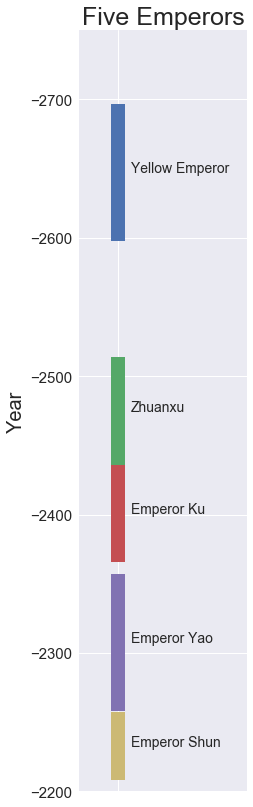

In [110]:
event = FiveEmperors['EnglishName']
begin = FiveEmperors['Start']
end = FiveEmperors['Finish']
length = FiveEmperors['Length']

df_lines = pd.DataFrame({'y1': begin, 
                             'y2': end})

segs = np.zeros((len(df_lines), 2,2))
segs[:,:,1] = df_lines[["y1","y2"]].values


fig, ax = plt.subplots(figsize=(3,14))

colors = [mcolors.to_rgba(c)
          for c in plt.rcParams['axes.prop_cycle'].by_key()['color']]

line_segments = LineCollection(segs, colors=colors, linewidths=14)
ax.add_collection(line_segments)

ax.set_ylim(-1,1)
plt.title('Five Emperors', fontsize = '25')
plt.ylabel('Year', fontsize = '20')
plt.yticks(fontsize = '15')
plt.xticks(range(len(begin)), "")

plt.ylim(-2750, -2200)
plt.xlim(-.3,1)

for i in range(5):
    plt.text(.1, begin.iloc[i] + length.iloc[i]/2, event.iloc[i], ha='left', fontsize = '14', rotation=0)

plt.gca().invert_yaxis()
fig.savefig('fiveemperors.png', dpi=100)
plt.show()

Also, a small note regarding for i in range(5). When we use a number like this, without a nicely named variable explaining its meaning, we refer to that as a "magic number" and it's best to avoid. It's better to create a variable n_emps = 5 or something like that, and always use that variable, rather than just the number 5. This is also very useful if you need to access the number of emperors many times; then you just need to change n_emps's value, rather than sifting through all your code to change all 5s to 10s or whatever

# Xia

The code below is showing, based on the Traditional Chronology, the totality of the Xia Dynasty and its individual rulers.

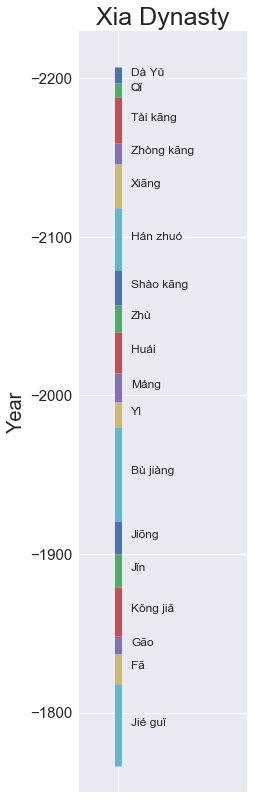

In [26]:
event = Xia['EnglishTempleName']
begin = Xia['Start']
end = Xia['Finish']
length = Xia['Length']

df_lines = pd.DataFrame({'y1': Xia['Start'], 
                             'y2': Xia['Finish']})

segs = np.zeros((len(df_lines), 2,2))
segs[:,:,1] = df_lines[["y1","y2"]].values


fig, ax = plt.subplots(figsize=(3,14))

colors = [mcolors.to_rgba(c)
          for c in plt.rcParams['axes.prop_cycle'].by_key()['color']]

line_segments = LineCollection(segs, colors=colors, linewidths=7)
ax.add_collection(line_segments)

ax.set_ylim(-1,1)
plt.title('Xia Dynasty', fontsize = '25')
plt.ylabel('Year', fontsize = '20')
plt.yticks(fontsize = '15')
plt.xticks(range(len(begin)), "")

plt.ylim(-2230, -1750)
plt.xlim(-.3,1)

for i in range(18):
    plt.text(.1, begin.iloc[i] + length.iloc[i]/2, event.iloc[i], ha='left', fontsize = '12', rotation=0)

plt.gca().invert_yaxis()
plt.show()
fig.savefig('xiadynasty.png', dpi=100)

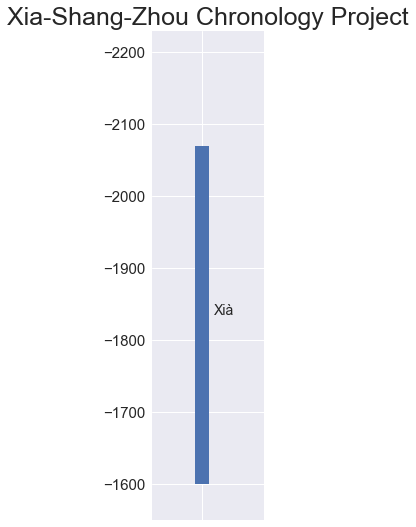

In [99]:
event = XiaXSZCP['Dynasty']
begin = XiaXSZCP['Start']
end = XiaXSZCP['Finish']
length = XiaXSZCP['Length']

df_lines = pd.DataFrame({'y1': XiaXSZCP['Start'], 
                             'y2': XiaXSZCP['Finish']})

segs = np.zeros((len(df_lines), 2,2))
segs[:,:,1] = df_lines[["y1","y2"]].values


fig, ax = plt.subplots(figsize=(2,9))

colors = [mcolors.to_rgba(c)
          for c in plt.rcParams['axes.prop_cycle'].by_key()['color']]

line_segments = LineCollection(segs, colors=colors, linewidths=14)
ax.add_collection(line_segments)

ax.set_ylim(-1,1)
plt.title('Xia-Shang-Zhou Chronology Project', fontsize = '25')
plt.yticks(fontsize = '15')
plt.xticks(range(len(begin)), "")

plt.ylim(-2230, -1550)
plt.xlim(-.8,1)

for i in range(1):
    plt.text(.2, begin.iloc[i] + length.iloc[i]/2, event.iloc[i], ha='left', fontsize = '14', rotation=0)

plt.gca().invert_yaxis()
plt.show()
fig.savefig('xiaxszcpdynasty.png', dpi=100)

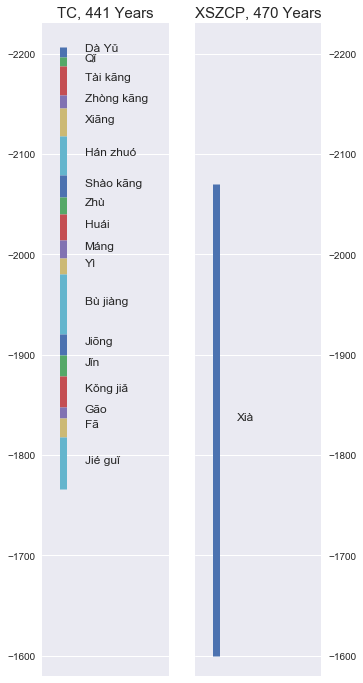

In [92]:
event = Xia['EnglishTempleName']
begin = Xia['Start']
end = Xia['Finish']
length = Xia['Length']

event2 = XiaXSZCP['Dynasty']
begin2 = XiaXSZCP['Start']
end2 = XiaXSZCP['Finish']
length2 = XiaXSZCP['Length']

XiaRuleTC = str(sum(Xia['Length']))
XiaRuleXSZCP = str(sum(XiaXSZCP['Length']))

df_lines = pd.DataFrame({'y1': Xia['Start'], 
                             'y2': Xia['Finish']})

df_lines2 = pd.DataFrame({'y1': XiaXSZCP['Start'], 
                             'y2': XiaXSZCP['Finish']})

segs = np.zeros((len(df_lines), 2,2))
segs[:,:,1] = df_lines[["y1","y2"]].values

segs2 = np.zeros((len(df_lines2), 2,2))
segs2[:,:,1] = df_lines2[["y1","y2"]].values

colors = [mcolors.to_rgba(c)
          for c in plt.rcParams['axes.prop_cycle'].by_key()['color']]

plt.subplots(figsize=(5,12))

ax1 = plt.subplot(1,2,1)
line_segments = LineCollection(segs, colors=colors, linewidths=7)
ax1.add_collection(line_segments)
for i in range(18):
    plt.text(.1, begin.iloc[i] + length.iloc[i]/2, event.iloc[i], ha='left', fontsize = '12', rotation=0)
plt.title('TC, '+XiaRuleTC+' Years', fontsize = '15')
plt.ylim(-2230, -1580)
plt.xlim(-.1,.5)
plt.gca().invert_yaxis()
plt.xticks([])

ax2 = plt.subplot(1,2,2)
line_segments2 = LineCollection(segs2, colors=colors, linewidths=7)
ax2.add_collection(line_segments2)
for i in range(1):
    plt.text(.1, begin2.iloc[i] + length2.iloc[i]/2, event2.iloc[i], ha='left', fontsize = '12', rotation=0)
plt.title('XSZCP, '+XiaRuleXSZCP+' Years', fontsize = '15')
plt.ylim(-2230, -1580)
plt.xlim(-.1,.5)
plt.gca().invert_yaxis()
plt.xticks([])
ax2.yaxis.tick_right()


plt.savefig('xiaTCvsXSZCP.png', dpi=300)
plt.show()


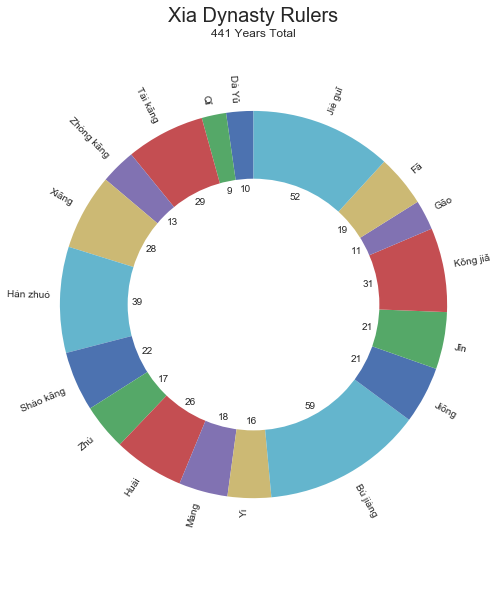

In [136]:
#figure size
fig_size[0] = 2
fig_size[1] = 2

# Pie chart
labels = Xia['EnglishTempleName']
sizes = Xia['Length']
total = sum(sizes)

#colors
colors = [mcolors.to_rgba(c)
          for c in plt.rcParams['axes.prop_cycle'].by_key()['color']]

#plotting
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, startangle=90,
        autopct=lambda p: '{:.0f}'.format(p * total / 100), pctdistance=.6, labeldistance=1.05, rotatelabels=True)

#draw circle
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#variable for summing the dynasty length
XiaRule = str(sum(Xia['Length']))


# Equal aspect ratio ensures that pie is drawn as a circle

ax1.axis('equal')  
plt.tight_layout()
plt.title('Xia Dynasty Rulers', fontsize=20, y=1)
plt.suptitle(XiaRule+' Years Total')
plt.show()
fig.savefig('xiarulers.png', dpi=300, bbox_inches="tight")


# Shang

Below I'm going to compare the traditional chronology against the XSZCP for the Early Shang Dynasty.

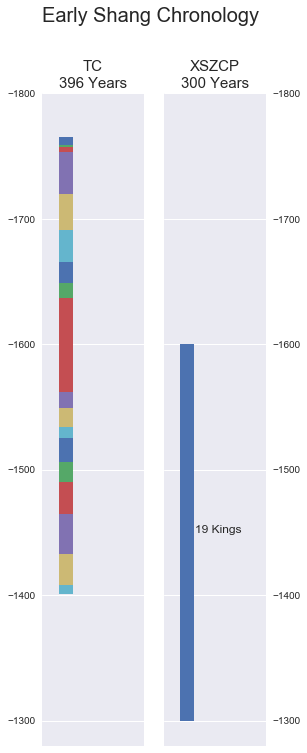

In [89]:
event = EarlyShang['EnglishTempleName']
begin = EarlyShang['Start']
length = EarlyShang['Length']

event2 = EarlyShangXSZCP['EnglishName']
begin2 = EarlyShangXSZCP['Start']
length2 = EarlyShangXSZCP['Length']

EarlyShangRuleTC = str(sum(EarlyShang['Length']))

df_lines = pd.DataFrame({'y1': EarlyShang['Start'], 
                             'y2': EarlyShang['Finish']})

df_lines2 = pd.DataFrame({'y1': EarlyShangXSZCP['Start'], 
                             'y2': EarlyShangXSZCP['Finish']})

segs = np.zeros((len(df_lines), 2,2))
segs[:,:,1] = df_lines[["y1","y2"]].values

segs2 = np.zeros((len(df_lines2), 2,2))
segs2[:,:,1] = df_lines2[["y1","y2"]].values

colors = [mcolors.to_rgba(c)
          for c in plt.rcParams['axes.prop_cycle'].by_key()['color']]

plt.subplots(figsize=(4,12))

ax1 = plt.subplot(1,2,1)
line_segments = LineCollection(segs, colors=colors, linewidths=14)
ax1.add_collection(line_segments)
plt.title('TC\n'+EarlyShangRuleTC+' Years', fontsize = '15')
plt.ylim(-1800, -1280)
plt.xlim(-.3,1)
plt.gca().invert_yaxis()
plt.yticks(fontsize = '10')
plt.xticks([])


ax2 = plt.subplot(1,2,2)
line_segments2 = LineCollection(segs2, colors=colors, linewidths=14)
ax2.add_collection(line_segments2)
for i in range(1):
    plt.text(.1, begin2.iloc[i] + length2.iloc[i]/2, event2.iloc[i], ha='left', fontsize = '12', rotation=0)
    plt.title('XSZCP\n300 Years', fontsize = '15')

plt.ylim(-1800, -1280)
plt.xlim(-.3,1)
plt.gca().invert_yaxis()
ax2.yaxis.tick_right()
plt.yticks(fontsize = '10')
plt.xticks([])
plt.suptitle('Early Shang Chronology', fontsize='20')
plt.show()


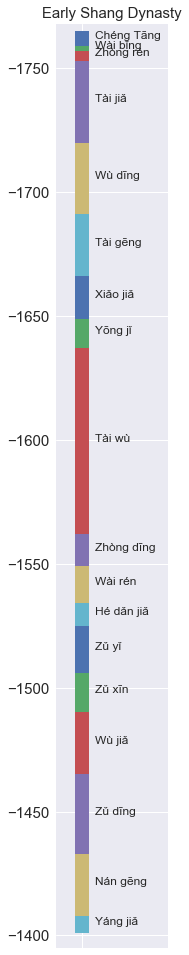

In [87]:
event = EarlyShang['EnglishTempleName']
begin = EarlyShang['Start']
length = EarlyShang['Length']
EarlyShangRuleTC = str(sum(EarlyShang['Length']))

df_lines = pd.DataFrame({'y1': EarlyShang['Start'], 
                             'y2': EarlyShang['Finish']})

segs = np.zeros((len(df_lines), 2,2))
segs[:,:,1] = df_lines[["y1","y2"]].values


fig, ax = plt.subplots(figsize=(2,17))

colors = [mcolors.to_rgba(c)
          for c in plt.rcParams['axes.prop_cycle'].by_key()['color']]

line_segments = LineCollection(segs, colors=colors, linewidths=14)
ax.add_collection(line_segments)

ax.set_ylim(-1,1)
plt.title('Early Shang Dynasty', fontsize = '15')
plt.yticks(fontsize = '15')
plt.xticks(range(len(begin)), "")

plt.ylim(-1768, -1395)
plt.xlim(-.3,1)

for i in range(18):
    plt.text(.15, begin.iloc[i] + length.iloc[i]/2, event.iloc[i], ha='left', fontsize = '12', rotation=0)

plt.gca().invert_yaxis()
plt.show()

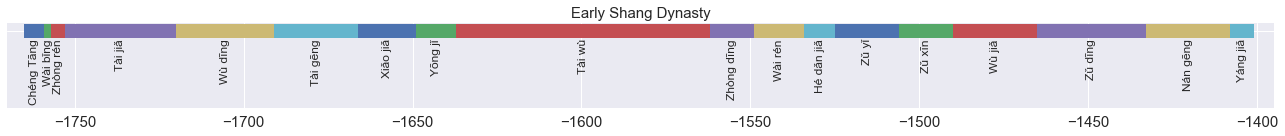

In [82]:
event = EarlyShang['EnglishTempleName']
begin = EarlyShang['Start']
length = EarlyShang['Length']
EarlyShangRuleTC = str(sum(EarlyShang['Length']))

df_lines = pd.DataFrame({'y1': EarlyShang['Start'], 
                             'y2': EarlyShang['Finish']})

segs = np.zeros((len(df_lines), 2,2))
segs[:,:,0] = df_lines[["y1","y2"]].values


fig, ax = plt.subplots(figsize=(18,2))

colors = [mcolors.to_rgba(c)
          for c in plt.rcParams['axes.prop_cycle'].by_key()['color']]

line_segments = LineCollection(segs, colors=colors, linewidths=14)
ax.add_collection(line_segments)

ax.set_ylim(-1,1)
plt.title('Early Shang Dynasty', fontsize = '15')
plt.xticks(fontsize = '15')
plt.yticks(range(len(begin)), "")

plt.xlim(-1770, -1395)
plt.ylim(-1,.1)

for i in range(18):
    plt.text(begin.iloc[i] + length.iloc[i]/2, -.2, event.iloc[i], ha='center', fontsize = '12', rotation=90)
    
plt.tight_layout()
plt.savefig('file.png', filetype='png')
plt.show()


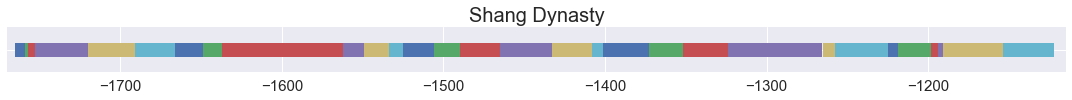

In [85]:
event = Shang['EnglishTempleName']
begin = Shang['Start']
end = Shang['Finish']
length = Shang['Length']
ShangRuleTC = str(sum(EarlyShang['Length']))

df_lines = pd.DataFrame({'y1': begin, 
                             'y2': end})

segs = np.zeros((len(df_lines), 2,2))
segs[:,:,0] = df_lines[["y1","y2"]].values


fig, ax = plt.subplots(figsize=(15,1.5))

colors = [mcolors.to_rgba(c)
          for c in plt.rcParams['axes.prop_cycle'].by_key()['color']]

line_segments = LineCollection(segs, colors=colors, linewidths=14)
ax.add_collection(line_segments)

ax.set_ylim(-1,1)
plt.title('Shang Dynasty', fontsize = '20')
plt.xticks(fontsize = '15')
plt.yticks(range(len(begin)), "")

plt.xlim(-1770, -1115)
plt.ylim(-1,1)

plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()